/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_2582/3794398111.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


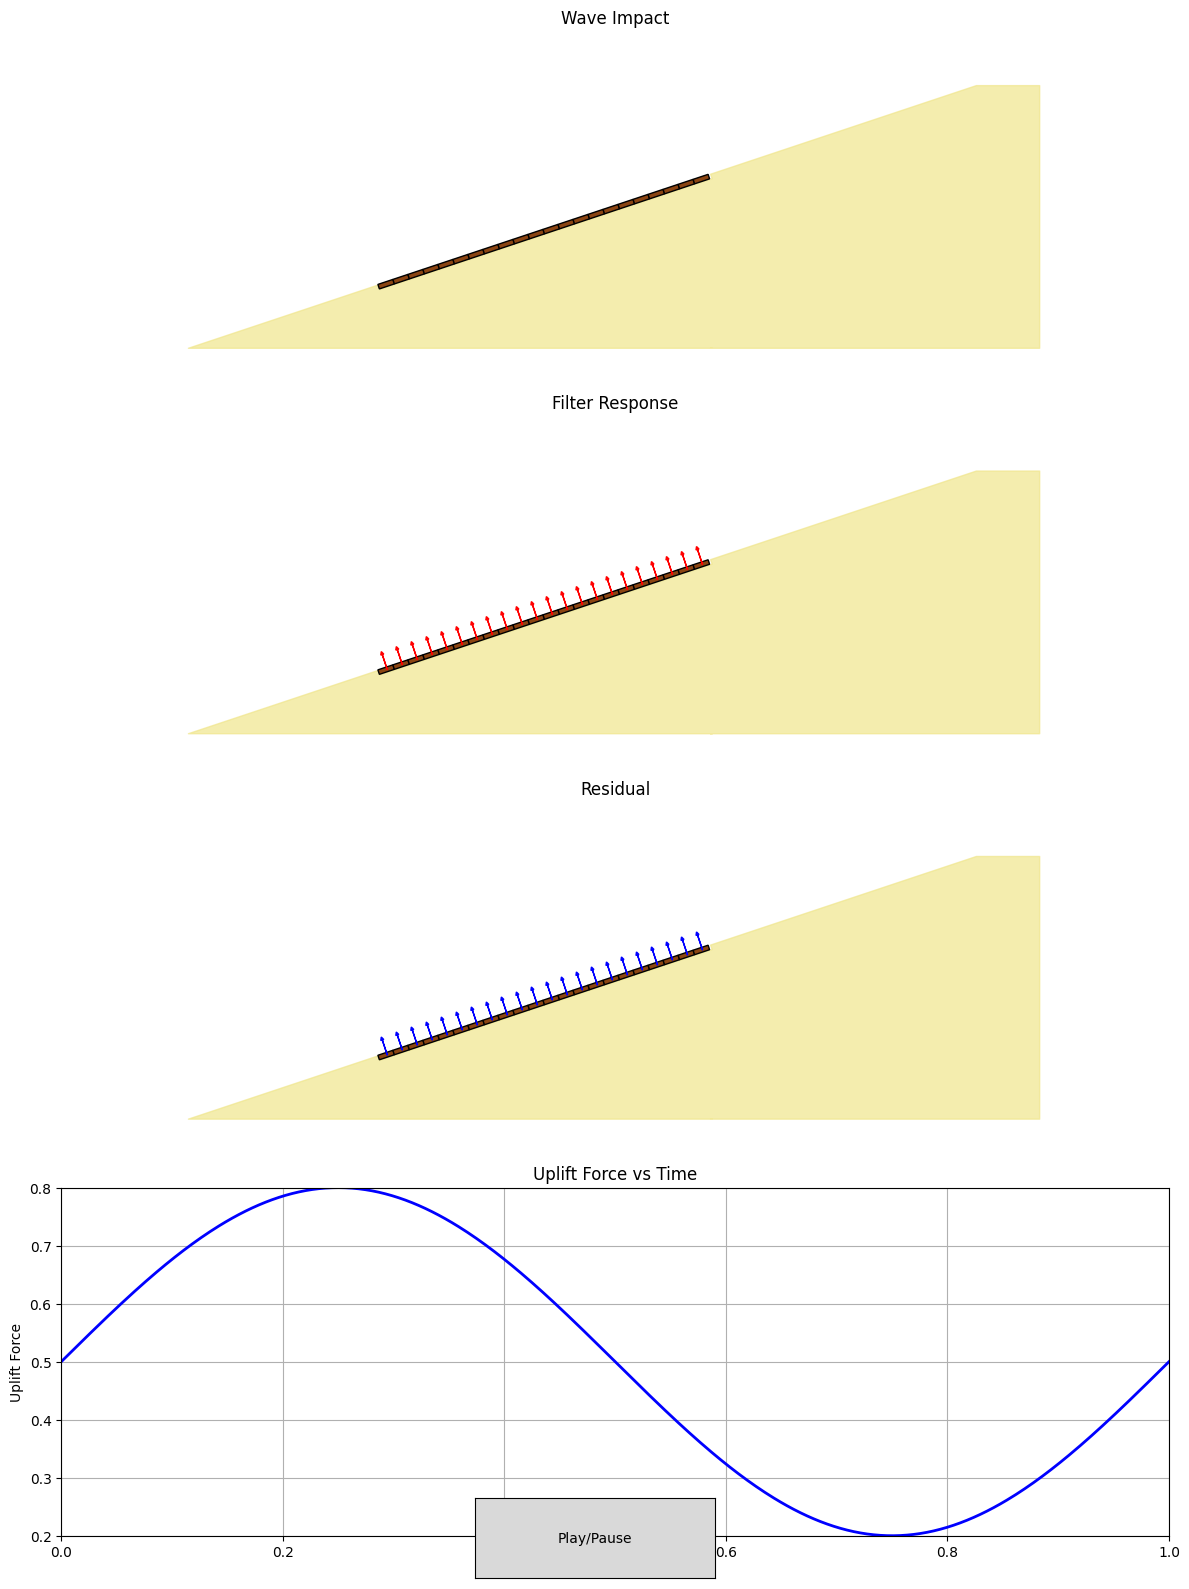

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button

# --- Dike Profile Coordinates ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]

# --- Block Revetment Coordinates ---
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope_angle = np.degrees(np.arctan(1 / 3))
x_step = block_width * np.cos(np.radians(slope_angle))
y_step = block_width * np.sin(np.radians(slope_angle))
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]

# --- Uplift Force Function ---
def uplift_force(t):
    return 0.5 + 0.3 * np.sin(2 * np.pi * t)

# --- Plot Setup ---
fig, axes = plt.subplots(4, 1, figsize=(12, 16))  # Adjusted height for equal subplot sizes
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots

# --- 1st Plot: Wave Impact ---
axes[0].fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
for i in range(n_blocks):
    rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                         angle=slope_angle, color='saddlebrown', ec='black', lw=1)
    axes[0].add_patch(rect)
axes[0].set_xlim(-1, 28)
axes[0].set_ylim(-1, 10)
axes[0].set_aspect('equal')
axes[0].set_title("Wave Impact")
axes[0].axis('off')

# --- 2nd Plot: Filter Response ---
arrows_filter = []
axes[1].fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
for i in range(n_blocks):
    rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                         angle=slope_angle, color='saddlebrown', ec='black', lw=1)
    axes[1].add_patch(rect)
    arrow_x = block_x[i] + block_width / 2
    arrow_y = block_y[i] + block_height
    arrow_dx = -np.sin(np.radians(slope_angle)) * 0.5
    arrow_dy = np.cos(np.radians(slope_angle)) * 0.5
    arrow = axes[1].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, head_width=0.1, head_length=0.1,
                          fc='red', ec='red')
    arrows_filter.append(arrow)
axes[1].set_xlim(-1, 28)
axes[1].set_ylim(-1, 10)
axes[1].set_aspect('equal')
axes[1].set_title("Filter Response")
axes[1].axis('off')

# --- 3rd Plot: Residual ---
arrows_residual = []
axes[2].fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
for i in range(n_blocks):
    rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                         angle=slope_angle, color='saddlebrown', ec='black', lw=1)
    axes[2].add_patch(rect)
    arrow_x = block_x[i] + block_width / 2
    arrow_y = block_y[i] + block_height
    arrow_dx = -np.sin(np.radians(slope_angle)) * uplift_force(0.5)
    arrow_dy = np.cos(np.radians(slope_angle)) * uplift_force(0.5)
    arrow = axes[2].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, head_width=0.1, head_length=0.1,
                          fc='blue', ec='blue')
    arrows_residual.append(arrow)
axes[2].set_xlim(-1, 28)
axes[2].set_ylim(-1, 10)
axes[2].set_aspect('equal')
axes[2].set_title("Residual")
axes[2].axis('off')

# --- 4th Plot: Force-Time Graph ---
time = np.linspace(0, 1, 500)  # Time from 0 to 1 (normalized)
force = uplift_force(time)  # Calculate uplift force over time
line, = axes[3].plot(time, force, color='blue', lw=2)
axes[3].set_xlim(0, 1)
axes[3].set_ylim(0.2, 0.8)  # Adjusted to match the range of uplift_force
axes[3].set_title("Uplift Force vs Time")
axes[3].set_xlabel("Time (t)")
axes[3].set_ylabel("Uplift Force")
axes[3].grid(True)

# --- Animation Function ---
def update(frame):
    t = frame / 100  # Normalize frame to time (0 to 1)
    force = uplift_force(t)  # Get uplift force at time t
    line.set_ydata(uplift_force(time))  # Update force-time graph
    for i, arrow in enumerate(arrows_filter):
        arrow.remove()
        arrow_x = block_x[i] + block_width / 2
        arrow_y = block_y[i] + block_height
        arrow_dx = -np.sin(np.radians(slope_angle)) * force
        arrow_dy = np.cos(np.radians(slope_angle)) * force
        arrows_filter[i] = axes[1].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, head_width=0.1, head_length=0.1,
                                         fc='red', ec='red')
    for i, arrow in enumerate(arrows_residual):
        arrow.remove()
        arrow_x = block_x[i] + block_width / 2
        arrow_y = block_y[i] + block_height
        arrow_dx = -np.sin(np.radians(slope_angle)) * force
        arrow_dy = np.cos(np.radians(slope_angle)) * force
        arrows_residual[i] = axes[2].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, head_width=0.1, head_length=0.1,
                                           fc='blue', ec='blue')

# --- Animation Setup ---
ani = FuncAnimation(fig, update, frames=200, interval=50, repeat=True)

# --- Play/Pause Button ---
is_paused = False

def toggle_animation(event):
    global is_paused
    if is_paused:
        ani.event_source.start()
        is_paused = False
    else:
        ani.event_source.stop()
        is_paused = True

# Create button
ax_button = plt.axes([0.4, 0.01, 0.2, 0.05])  # Position for the button
button = Button(ax_button, 'Play/Pause')
button.on_clicked(toggle_animation)

# --- Show Plot ---
plt.tight_layout()
plt.show()

Werkt

/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_89271/3701483228.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


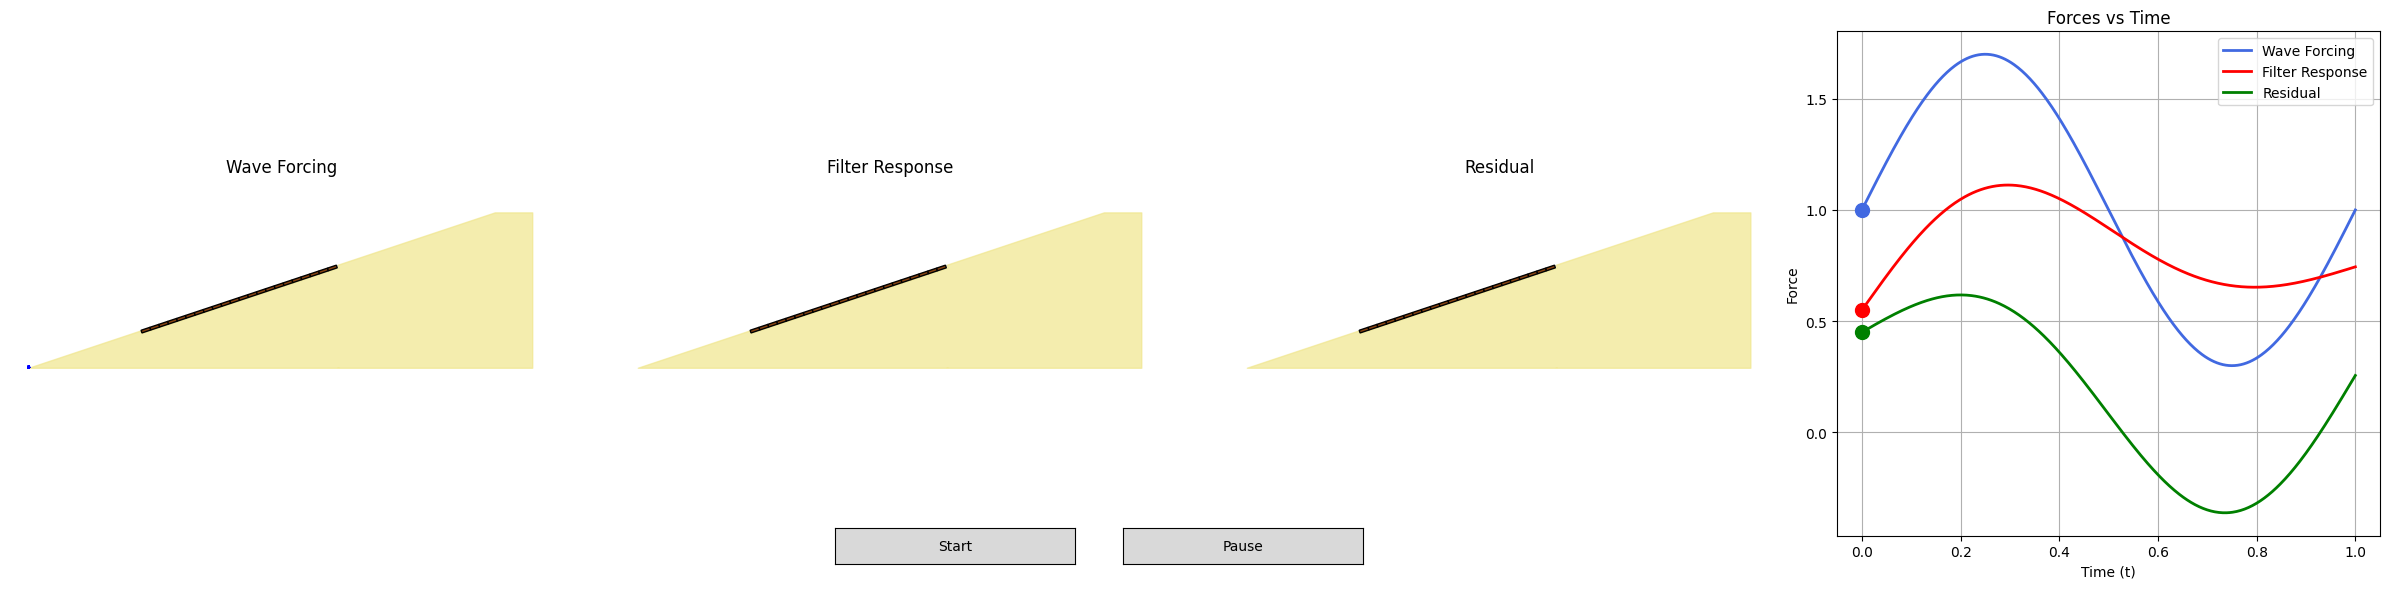

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button

# --- Time and Functions ---
def wave_forcing(t):
    return 1.0 + 0.7 * np.sin(2 * np.pi * t)  # e.g., simple sine wave

def filter_response(t):
    # Phase lag and damping for realistic filter behavior
    return 0.8 + 0.5 * np.sin(2 * np.pi * t - np.pi/6) * np.exp(-1.5 * t)

def residual(t):
    return wave_forcing(t) - filter_response(t)

# --- Dike Profile Coordinates ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]

# --- Block Revetment Coordinates ---
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope_angle = np.degrees(np.arctan(1 / 3))
x_step = block_width * np.cos(np.radians(slope_angle))
y_step = block_width * np.sin(np.radians(slope_angle))
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]

# --- Plot Setup ---
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
plt.subplots_adjust(bottom=0.15)  # Room for buttons

# --- Static Dike and Blocks for all plots ---
def plot_blocks(ax):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    ax.set_xlim(-1, 28)
    ax.set_ylim(-1, 10)
    ax.set_aspect('equal')
    ax.axis('off')

for i in range(3):
    plot_blocks(axes[i])

axes[0].set_title("Wave Forcing")
axes[1].set_title("Filter Response")
axes[2].set_title("Residual")

# --- Arrows for Each Plot ---
arrow_objs = [[], [], []]  # One list per subplot

for ax_arrows in arrow_objs:
    for _ in range(n_blocks):
        arr = axes[0].arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        ax_arrows.append(arr)

# --- Force-Time Graph (All three, animated dots) ---
time_plot = np.linspace(0, 1, 500)
wave_vals = wave_forcing(time_plot)
filter_vals = filter_response(time_plot)
resid_vals = residual(time_plot)
line_wave, = axes[3].plot(time_plot, wave_vals, color='royalblue', lw=2, label="Wave Forcing")
line_filter, = axes[3].plot(time_plot, filter_vals, color='red', lw=2, label="Filter Response")
line_resid, = axes[3].plot(time_plot, resid_vals, color='green', lw=2, label="Residual")
dot_wave, = axes[3].plot([0], [wave_forcing(0)], 'o', color='royalblue', markersize=10)
dot_filter, = axes[3].plot([0], [filter_response(0)], 'o', color='red', markersize=10)
dot_resid, = axes[3].plot([0], [residual(0)], 'o', color='green', markersize=10)

axes[3].set_title("Forces vs Time")
axes[3].set_xlabel("Time (t)")
axes[3].set_ylabel("Force")
axes[3].grid(True)
axes[3].legend()

# --- Animation Control ---
running = {'animate': False}
current_frame = {'frame': 0}

def animate(frame):
    if not running['animate']:
        frame = current_frame['frame']
    else:
        current_frame['frame'] = frame
    t = frame / 100
    forces = [wave_forcing(t), filter_response(t), residual(t)]
    colors = ['royalblue', 'red', 'green']
    # For each subplot, update arrows
    for i in range(3):
        F = forces[i]
        for j, arr in enumerate(arrow_objs[i]):
            arrow_x = block_x[j] + block_width / 2
            arrow_y = block_y[j] + block_height
            arrow_dx = -np.sin(np.radians(slope_angle)) * F
            arrow_dy = np.cos(np.radians(slope_angle)) * F
            arr.remove()
            arr_new = axes[i].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                                    head_width=0.1, head_length=0.1, fc=colors[i], ec=colors[i])
            arrow_objs[i][j] = arr_new
    # Update dots on force-time graph
    dot_wave.set_data([t], [forces[0]])
    dot_filter.set_data([t], [forces[1]])
    dot_resid.set_data([t], [forces[2]])
    return sum(arrow_objs, []) + [dot_wave, dot_filter, dot_resid]

# --- Buttons ---
ax_start = plt.axes([0.35, 0.05, 0.1, 0.06])
ax_pause = plt.axes([0.47, 0.05, 0.1, 0.06])
btn_start = Button(ax_start, 'Start')
btn_pause = Button(ax_pause, 'Pause')

def start(event):
    running['animate'] = True

def pause(event):
    running['animate'] = False

btn_start.on_clicked(start)
btn_pause.on_clicked(pause)

# --- Run Animation ---
ani = FuncAnimation(fig, animate, frames=101, interval=50, blit=False, repeat=True)
plt.tight_layout()
plt.show()


/Users/thomaspennock/Library/Python/3.9/lib/python/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_89271/3349024088.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


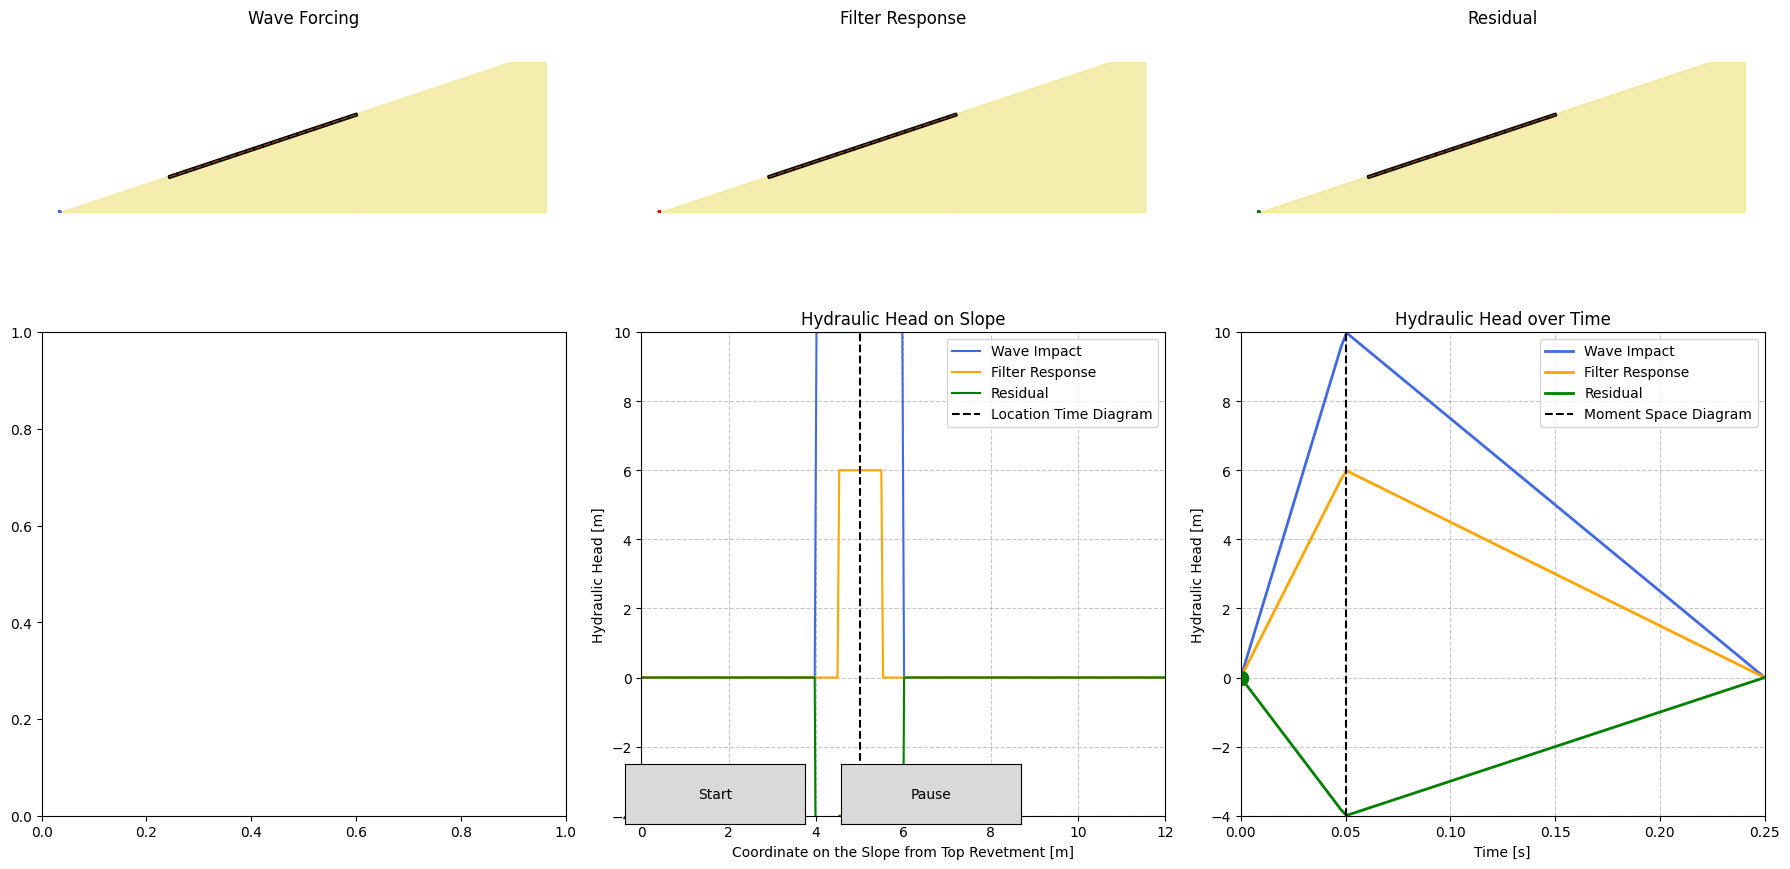

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button

# --- Dike Profile & Block Coordinates ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope_angle = np.degrees(np.arctan(1 / 3))
x_step = block_width * np.cos(np.radians(slope_angle))
y_step = block_width * np.sin(np.radians(slope_angle))
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]

# --- Synthetic Data for Hydraulic Head Plots ---
# For subplot 5 (along slope) and subplot 6 (over time)
xx = np.linspace(0, 12, 300)      # Slope coordinate
tt = np.linspace(0, 0.25, 100)    # Time

wave_impact_x = np.where((xx > 4) & (xx < 6), 10, 0)
wave_impact_t = np.interp(tt, [0, 0.05, 0.25], [0, 10, 0])
filter_response_x = np.where((xx > 4.5) & (xx < 5.5), 6, 0)
filter_response_t = np.interp(tt, [0, 0.05, 0.25], [0, 6, 0])
residual_x =  filter_response_x - wave_impact_x
residual_t =  filter_response_t - wave_impact_t

# --- Prepare interpolation functions from plot 6 for animation ---
from scipy.interpolate import interp1d
t_anim = np.linspace(0, 0.25, 101)
wave_func = interp1d(tt, wave_impact_t, kind='linear')
filter_func = interp1d(tt, filter_response_t, kind='linear')
residual_func = interp1d(tt, residual_t, kind='linear')

# --- Plot Setup: 2 rows, 3 columns ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(bottom=0.15, hspace=0.33, wspace=0.18)

def plot_blocks(ax):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    ax.set_xlim(-1, 28)
    ax.set_ylim(-1, 10)
    ax.set_aspect('equal')
    ax.axis('off')

# --- Animated Subplots 1–3 ---
for i in range(3):
    plot_blocks(axes[0, i])
titles = ["Wave Forcing", "Filter Response", "Residual"]
for i in range(3):
    axes[0, i].set_title(titles[i])

# --- Animated Arrows for Each Plot ---
arrow_objs = [[], [], []]
colors = ['royalblue', 'red', 'green']
for plot_idx in range(3):
    for _ in range(n_blocks):
        arr = axes[0, plot_idx].arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, fc=colors[plot_idx], ec=colors[plot_idx])
        arrow_objs[plot_idx].append(arr)

# --- Remove Plot 4 (was axes[1, 0]) and use axes[1, 2] for the animated dot ---
# Now axes[1, 2] is the rightmost plot ("Hydraulic Head over Time"), and we'll add a moving dot to it.

# --- Plot 5: Hydraulic Head vs Slope Coordinate (axes[1,1]) ---
axes[1, 1].plot(xx, wave_impact_x, color='royalblue', label='Wave Impact')
axes[1, 1].plot(xx, filter_response_x, color='orange', label='Filter Response')
axes[1, 1].plot(xx, residual_x, color='green', label='Residual')
axes[1, 1].plot([5, 5], [-4, 10], 'k--', label='Location Time Diagram')
axes[1, 1].set_xlim(0, 12)
axes[1, 1].set_ylim(-4, 10)
axes[1, 1].set_xlabel('Coordinate on the Slope from Top Revetment [m]')
axes[1, 1].set_ylabel('Hydraulic Head [m]')
axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 1].legend(fontsize=10)
axes[1, 1].set_title("Hydraulic Head on Slope")

# --- Plot 6: Hydraulic Head vs Time (axes[1,2]) ---
line_wave, = axes[1, 2].plot(tt, wave_impact_t, color='royalblue', lw=2, label='Wave Impact')
line_filter, = axes[1, 2].plot(tt, filter_response_t, color='orange', lw=2, label='Filter Response')
line_resid, = axes[1, 2].plot(tt, residual_t, color='green', lw=2, label='Residual')
axes[1, 2].plot([0.05, 0.05], [-4, 10], 'k--', label='Moment Space Diagram')
axes[1, 2].set_xlim(0, 0.25)
axes[1, 2].set_ylim(-4, 10)
axes[1, 2].set_xlabel('Time [s]')
axes[1, 2].set_ylabel('Hydraulic Head [m]')
axes[1, 2].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 2].legend(fontsize=10)
axes[1, 2].set_title("Hydraulic Head over Time")
dot_wave, = axes[1, 2].plot([0], [wave_impact_t[0]], 'o', color='royalblue', markersize=10)
dot_filter, = axes[1, 2].plot([0], [filter_response_t[0]], 'o', color='orange', markersize=10)
dot_resid, = axes[1, 2].plot([0], [residual_t[0]], 'o', color='green', markersize=10)

# --- Animation Control ---
running = {'animate': False}
current_frame = {'frame': 0}

def animate(frame):
    if not running['animate']:
        frame = current_frame['frame']
    else:
        current_frame['frame'] = frame
    t = np.linspace(0, 0.25, 101)[frame]
    # Get values from the time series for animation (using interpolation)
    F_wave = float(wave_func(t))
    F_filter = float(filter_func(t))
    F_resid = float(residual_func(t))
    forces = [F_wave, F_filter, F_resid]
    for i in range(3):
        F = forces[i]
        for j, arr in enumerate(arrow_objs[i]):
            arrow_x = block_x[j] + block_width / 2
            arrow_y = block_y[j] + block_height
            arrow_dx = -np.sin(np.radians(slope_angle)) * F
            arrow_dy = np.cos(np.radians(slope_angle)) * F
            arr.remove()
            arr_new = axes[0, i].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                                    head_width=0.1, head_length=0.1, fc=colors[i], ec=colors[i])
            arrow_objs[i][j] = arr_new
    # Update dots in the hydraulic head over time plot
    dot_wave.set_data([t], [F_wave])
    dot_filter.set_data([t], [F_filter])
    dot_resid.set_data([t], [F_resid])
    return sum(arrow_objs, []) + [dot_wave, dot_filter, dot_resid]

# --- Buttons (start/pause) ---
ax_start = plt.axes([0.35, 0.05, 0.1, 0.06])
ax_pause = plt.axes([0.47, 0.05, 0.1, 0.06])
btn_start = Button(ax_start, 'Start')
btn_pause = Button(ax_pause, 'Pause')

def start(event):
    running['animate'] = True

def pause(event):
    running['animate'] = False

btn_start.on_clicked(start)
btn_pause.on_clicked(pause)

# --- Run Animation ---
ani = FuncAnimation(fig, animate, frames=101, interval=50, blit=False, repeat=True)
plt.tight_layout()
plt.show()


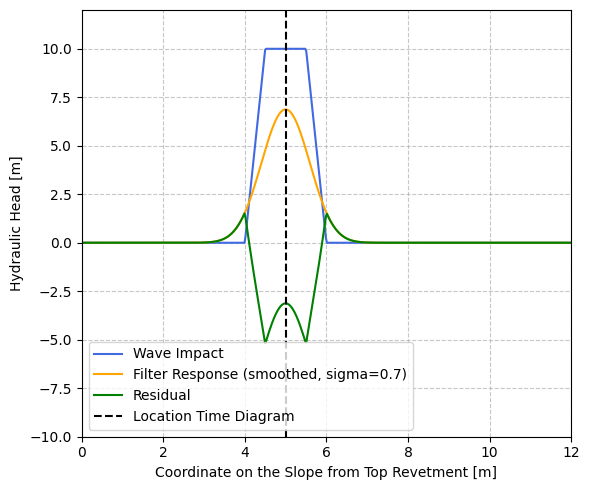

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# X-axis
x = np.linspace(0, 12, 500)

# Blue curve: Trapezoid
blue = np.piecewise(
    x,
    [x < 4, (x >= 4) & (x < 4.5), (x >= 4.5) & (x < 5.5), (x >= 5.5) & (x < 6), x >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),           # Rise from 0 to 10
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),    # Fall from 10 to 0
        0
    ]
)

# Orange curve: Smoothed rectangle with erf, sigma = 0.7
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
orange = A * (erf((x - x1) / sigma) - erf((x - x2) / sigma)) / 2

# Green: residual
green = orange - blue

plt.figure(figsize=(6, 5))
plt.plot(x, blue, color='royalblue', label='Wave Impact')
plt.plot(x, orange, color='orange', label='Filter Response (smoothed, sigma=0.7)')
plt.plot(x, green, color='green', label='Residual')
plt.axvline(5, color='k', linestyle='--', label='Location Time Diagram')
plt.xlim(0, 12)
plt.ylim(-10, 12)
plt.xlabel('Coordinate on the Slope from Top Revetment [m]')
plt.ylabel('Hydraulic Head [m]')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Pressure graph


L0 = 39.03 m
Iribarren number xi = 2.08
Run-down 2% exceedance R_d2% = 1.40 m


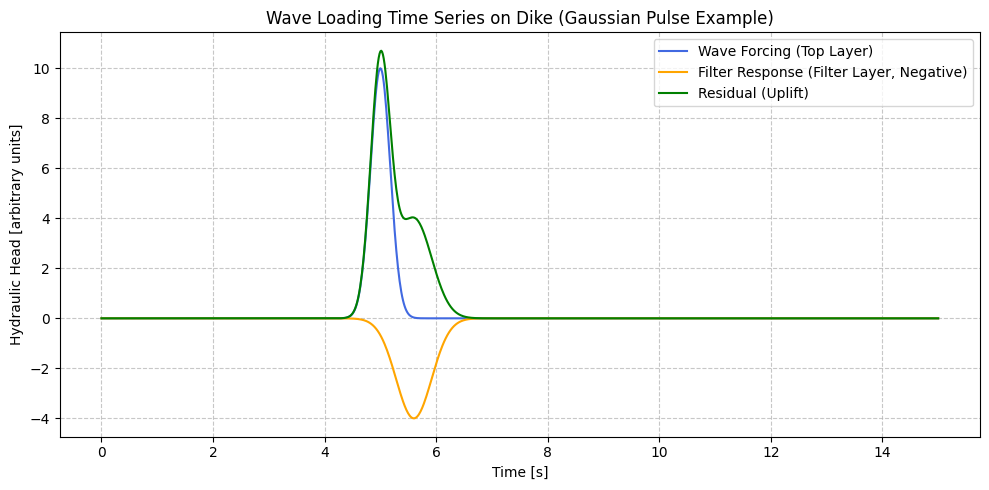

In [8]:
# --- Step 1: Key Parameters (User-defined for demonstration) ---
Hs = 1.0        # Significant wave height [m]
T = 5.0         # Wave period [s]
alpha = np.arctan(1/3)  # Slope angle [radians] (1:3 slope)

g = 9.81        # Gravity [m/s^2]

# --- Step 2: Compute L0, xi, R_d2% ---
L0 = g * T**2 / (2 * np.pi)
xi = np.tan(alpha) / np.sqrt(Hs / L0)
R_d2p = (-0.0344 * xi**2 + 0.55 * xi + 0.4) * Hs

print(f"L0 = {L0:.2f} m")
print(f"Iribarren number xi = {xi:.2f}")
print(f"Run-down 2% exceedance R_d2% = {R_d2p:.2f} m")

# --- Step 3: Wave Forcing as Pulse at t=5s ---
t = np.linspace(0, 15, 1000)
impact_time = 5  # seconds

# Gaussian pulse for wave impact
wave_forcing = 10 * np.exp(-((t-impact_time)/0.25)**2)

# Filter response: damped, delayed, negative pulse
delay = 0.6    # seconds
damping = 0.4  # fraction of wave forcing
filter_response = -damping * 10 * np.exp(-((t-(impact_time+delay))/0.45)**2)

# Residual (uplift)
residual = wave_forcing - filter_response

# --- Step 4: Plot ---
plt.figure(figsize=(10, 5))
plt.plot(t, wave_forcing, label="Wave Forcing (Top Layer)", color='royalblue')
plt.plot(t, filter_response, label="Filter Response (Filter Layer, Negative)", color='orange')
plt.plot(t, residual, label="Residual (Uplift)", color='green')
plt.xlabel("Time [s]")
plt.ylabel("Hydraulic Head [arbitrary units]")
plt.title("Wave Loading Time Series on Dike (Gaussian Pulse Example)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

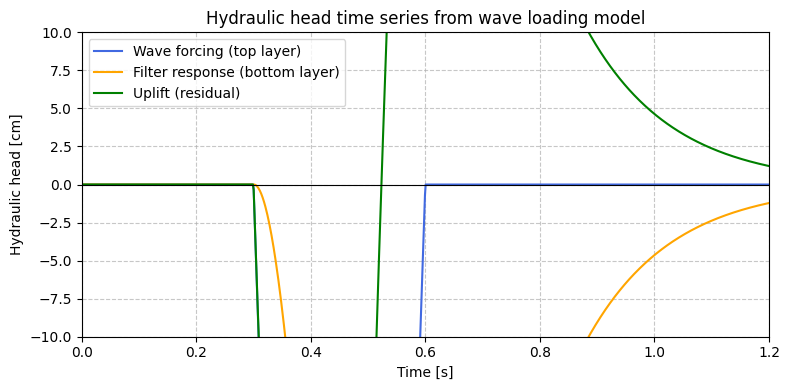

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters (simplified for demonstration) ---
Hs = 1.0          # Significant wave height [m]
g = 9.81          # Gravity [m/s^2]
rho_w = 1000      # Density [kg/m^3]
xi = 2.0          # Iribarren number (example)
t_r = 0.15        # Rise time [s] (from thesis)
Pmax = rho_w * g * Hs * (8 - 1.6*xi - 2*(xi - 0.2)**2)  # From thesis formula

# --- Time array ---
t = np.linspace(0, 1.2, 1000)

# --- 1. Wave Impact Pulse (Triangular based on rise time and amplitude) ---
def triangular_pulse(t, center, width, amplitude):
    return amplitude * np.maximum(1 - np.abs((t - center) / width), 0)

center = 0.45         # Center of the wave impact pulse [s]
width = t_r           # Pulse width [s]
A = Pmax / (rho_w * g)  # Amplitude in [m] (hydraulic head)
Phi_T = triangular_pulse(t, center=center, width=width, amplitude=A)

# --- 2. Filter Response (ODE: tau dPhi_F/dt + Phi_F = Phi_T) ---
tau = 0.15            # [s] - time constant, can be calculated from filter properties
dt = t[1] - t[0]
Phi_F = np.zeros_like(t)
for i in range(1, len(t)):
    dPhi = (Phi_T[i-1] - Phi_F[i-1]) / tau
    Phi_F[i] = Phi_F[i-1] + dt * dPhi

# --- 3. Residual uplift ---
Phi_res = Phi_T - Phi_F

# --- Plot (match thesis style) ---
plt.figure(figsize=(8, 4))
plt.plot(t, Phi_T * 100, color='royalblue', label="Wave forcing (top layer)")
plt.plot(t, Phi_F * 100, color='orange', label="Filter response (bottom layer)")
plt.plot(t, Phi_res * 100, color='green', label="Uplift (residual)")
plt.axhline(0, color='k', lw=0.8)
plt.xlim(0, 1.2)
plt.ylim(-10, 10)
plt.xlabel("Time [s]")
plt.ylabel("Hydraulic head [cm]")
plt.title("Hydraulic head time series from wave loading model")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/Users/thomaspennock/Library/Python/3.9/lib/python/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_2582/2763843082.py:175: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


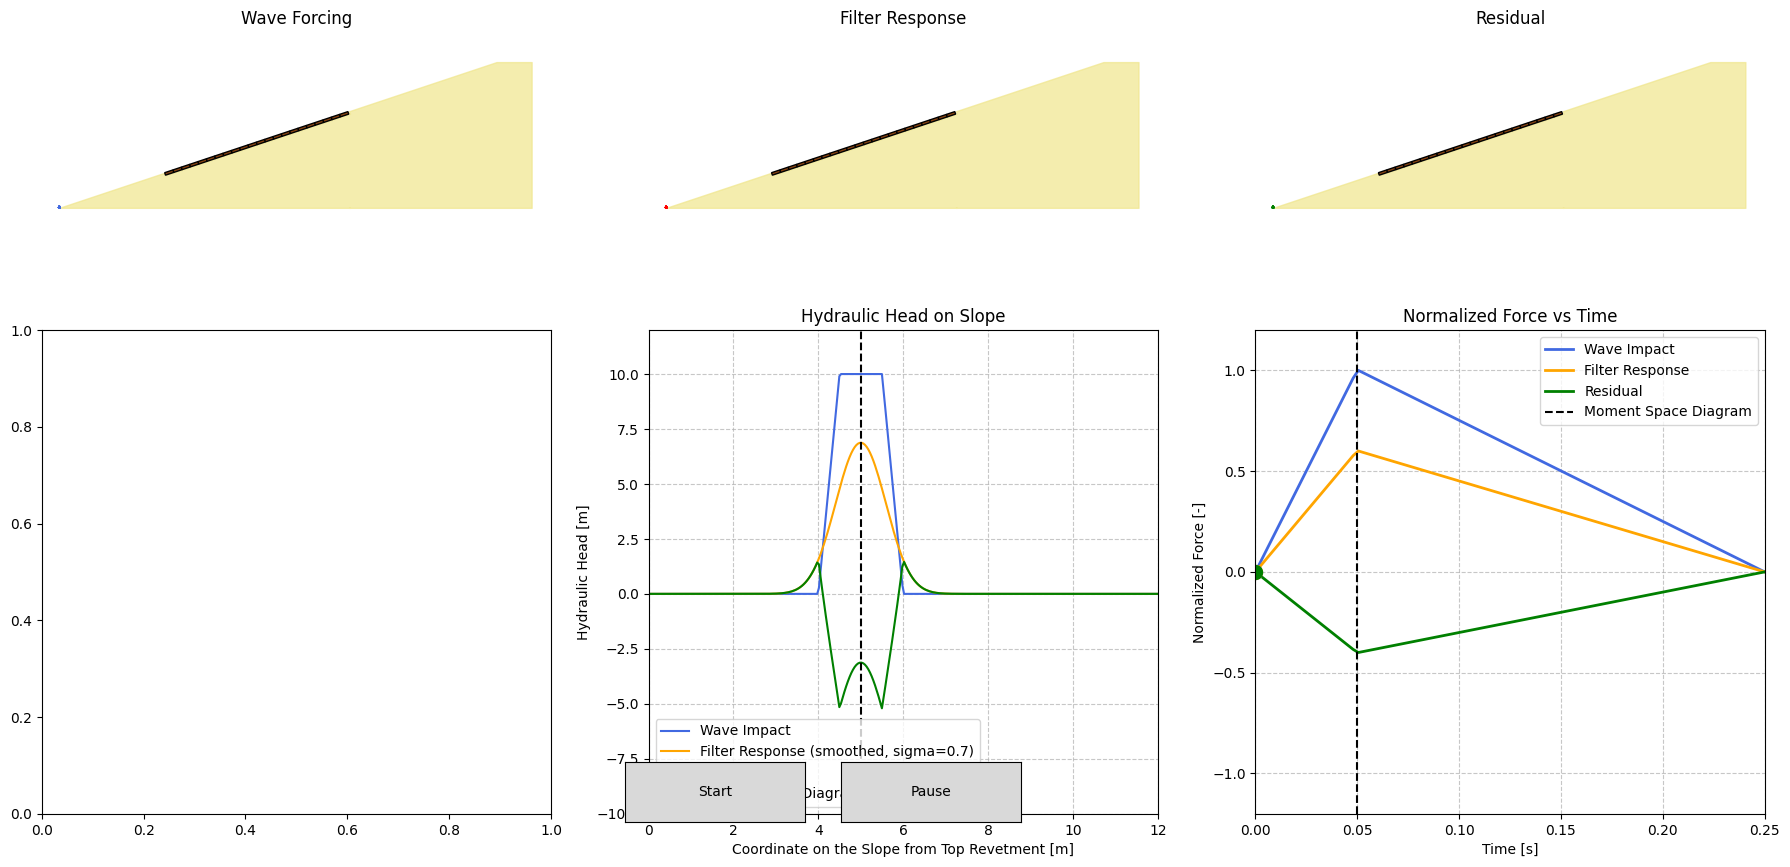

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button
from scipy.interpolate import interp1d

# --- Dike Profile & Block Coordinates (unchanged) ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope_angle = np.degrees(np.arctan(1 / 3))
x_step = block_width * np.cos(np.radians(slope_angle))
y_step = block_width * np.sin(np.radians(slope_angle))
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]

# --- Slope coordinate (xx) for plot 5 ---
xx = np.linspace(0, 12, 300)      # Slope coordinate

# --- Blue curve: Trapezoid (wave impact) ---
wave_impact_x = np.piecewise(
    xx,
    [xx < 4, (xx >= 4) & (xx < 4.5), (xx >= 4.5) & (xx < 5.5), (xx >= 5.5) & (xx < 6), xx >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),           # Rise from 0 to 10
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),    # Fall from 10 to 0
        0
    ]
)

# --- Orange curve: Smoothed rectangle with erf, sigma = 0.7 ---
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
filter_response_x = A * (erf((xx - x1) / sigma) - erf((xx - x2) / sigma)) / 2

# --- Green: residual ---
residual_x = filter_response_x - wave_impact_x

# --- For subplot 6 (time-plot): Normalize by the maximum force ---
tt = np.linspace(0, 0.25, 100)    # Time

# Use previous time-dependent definitions, or adjust as needed:
wave_impact_t = np.interp(tt, [0, 0.05, 0.25], [0, 10, 0])
filter_response_t = np.interp(tt, [0, 0.05, 0.25], [0, 6, 0])
residual_t = filter_response_t - wave_impact_t

# Normalize all curves by the highest absolute value of wave_impact_t
norm_factor = np.max(np.abs(wave_impact_t))
wave_impact_t /= norm_factor
filter_response_t /= norm_factor
residual_t /= norm_factor

# --- Prepare interpolation functions from plot 6 for animation ---
t_anim = np.linspace(0, 0.25, 101)
wave_func = interp1d(tt, wave_impact_t, kind='linear')
filter_func = interp1d(tt, filter_response_t, kind='linear')
residual_func = interp1d(tt, residual_t, kind='linear')

# --- Plot Setup: 2 rows, 3 columns ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(bottom=0.15, hspace=0.33, wspace=0.18)

def plot_blocks(ax):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    ax.set_xlim(-1, 28)
    ax.set_ylim(-1, 10)
    ax.set_aspect('equal')
    ax.axis('off')

# --- Animated Subplots 1–3 ---
for i in range(3):
    plot_blocks(axes[0, i])
titles = ["Wave Forcing", "Filter Response", "Residual"]
for i in range(3):
    axes[0, i].set_title(titles[i])

# --- Animated Arrows for Each Plot (as before) ---
arrow_objs = [[], [], []]
colors = ['royalblue', 'red', 'green']
for plot_idx in range(3):
    for _ in range(n_blocks):
        arr = axes[0, plot_idx].arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, fc=colors[plot_idx], ec=colors[plot_idx])
        arrow_objs[plot_idx].append(arr)

# --- Plot 5: Hydraulic Head vs Slope Coordinate (axes[1,1]) with NEW FUNCTIONS ---
axes[1, 1].plot(xx, wave_impact_x, color='royalblue', label='Wave Impact')
axes[1, 1].plot(xx, filter_response_x, color='orange', label='Filter Response (smoothed, sigma=0.7)')
axes[1, 1].plot(xx, residual_x, color='green', label='Residual')
axes[1, 1].axvline(5, color='k', linestyle='--', label='Location Time Diagram')
axes[1, 1].set_xlim(0, 12)
axes[1, 1].set_ylim(-10, 12)
axes[1, 1].set_xlabel('Coordinate on the Slope from Top Revetment [m]')
axes[1, 1].set_ylabel('Hydraulic Head [m]')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 1].set_title("Hydraulic Head on Slope")

# --- Plot 6: Normalized Force-Time Graph (axes[1,2]) ---
line_wave, = axes[1, 2].plot(tt, wave_impact_t, color='royalblue', lw=2, label='Wave Impact')
line_filter, = axes[1, 2].plot(tt, filter_response_t, color='orange', lw=2, label='Filter Response')
line_resid, = axes[1, 2].plot(tt, residual_t, color='green', lw=2, label='Residual')
axes[1, 2].plot([0.05, 0.05], [-1.2, 1.2], 'k--', label='Moment Space Diagram')
axes[1, 2].set_xlim(0, 0.25)
axes[1, 2].set_ylim(-1.2, 1.2)
axes[1, 2].set_xlabel('Time [s]')
axes[1, 2].set_ylabel('Normalized Force [-]')
axes[1, 2].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 2].legend(fontsize=10)
axes[1, 2].set_title("Normalized Force vs Time")
dot_wave, = axes[1, 2].plot([0], [wave_impact_t[0]], 'o', color='royalblue', markersize=10)
dot_filter, = axes[1, 2].plot([0], [filter_response_t[0]], 'o', color='orange', markersize=10)
dot_resid, = axes[1, 2].plot([0], [residual_t[0]], 'o', color='green', markersize=10)

# --- Animation Control ---
running = {'animate': False}
current_frame = {'frame': 0}

def animate(frame):
    if not running['animate']:
        frame = current_frame['frame']
    else:
        current_frame['frame'] = frame
    t = np.linspace(0, 0.25, 101)[frame]
    # Get values from the time series for animation (using interpolation)
    F_wave = float(wave_func(t))
    F_filter = float(filter_func(t))
    F_resid = float(residual_func(t))
    forces = [F_wave, F_filter, F_resid]
    for i in range(3):
        F = forces[i]
        for j, arr in enumerate(arrow_objs[i]):
            arrow_x = block_x[j] + block_width / 2
            arrow_y = block_y[j] + block_height
            arrow_dx = -np.sin(np.radians(slope_angle)) * F
            arrow_dy = np.cos(np.radians(slope_angle)) * F
            arr.remove()
            arr_new = axes[0, i].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                                    head_width=0.1, head_length=0.1, fc=colors[i], ec=colors[i])
            arrow_objs[i][j] = arr_new
    # Update dots in the normalized force-time plot
    dot_wave.set_data([t], [F_wave])
    dot_filter.set_data([t], [F_filter])
    dot_resid.set_data([t], [F_resid])
    return sum(arrow_objs, []) + [dot_wave, dot_filter, dot_resid]

# --- Buttons (start/pause) ---
ax_start = plt.axes([0.35, 0.05, 0.1, 0.06])
ax_pause = plt.axes([0.47, 0.05, 0.1, 0.06])
btn_start = Button(ax_start, 'Start')
btn_pause = Button(ax_pause, 'Pause')

def start(event):
    running['animate'] = True

def pause(event):
    running['animate'] = False

btn_start.on_clicked(start)
btn_pause.on_clicked(pause)

# --- Run Animation ---
ani = FuncAnimation(fig, animate, frames=101, interval=50, blit=False, repeat=True)
plt.tight_layout()
plt.show()



Block y-centers: [np.float64(1.935), np.float64(2.093113883008419), np.float64(2.251227766016838), np.float64(2.409341649025257), np.float64(2.567455532033676), np.float64(2.725569415042095), np.float64(2.883683298050514), np.float64(3.041797181058933), np.float64(3.199911064067352), np.float64(3.358024947075771), np.float64(3.51613883008419), np.float64(3.674252713092609), np.float64(3.8323665961010276), np.float64(3.990480479109447), np.float64(4.148594362117866), np.float64(4.306708245126285), np.float64(4.464822128134704), np.float64(4.622936011143123), np.float64(4.781049894151542), np.float64(4.939163777159961), np.float64(5.09727766016838), np.float64(5.255391543176799)]


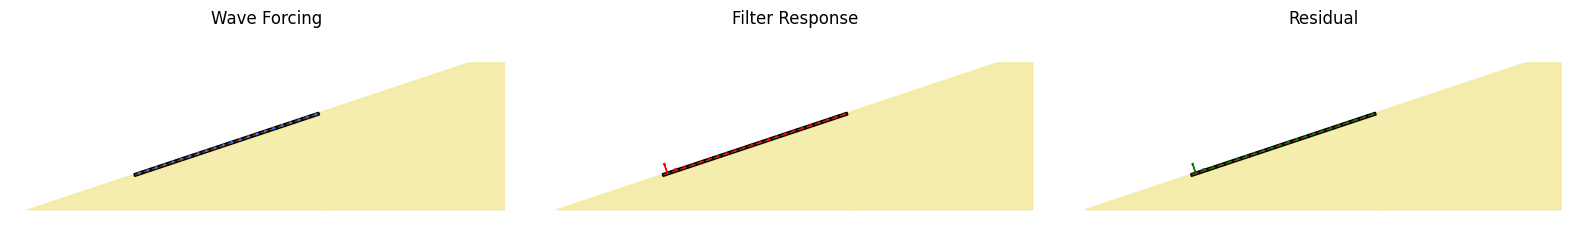

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.interpolate import interp1d

# --- Dike Profile & Block Coordinates ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope_angle = np.degrees(np.arctan(1 / 3))
x_step = block_width * np.cos(np.radians(slope_angle))
y_step = block_width * np.sin(np.radians(slope_angle))
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]

# --- Add y-centres array here ---
block_y_centers = [block_y[j] + block_height / 2 for j in range(n_blocks)]
print("Block y-centers:", block_y_centers)

# --- Slope coordinate for arrows (xx) ---
xx = np.linspace(0, 12, 300)

# --- Blue curve: Trapezoid (wave impact) ---
wave_impact_x = np.piecewise(
    xx,
    [xx < 4, (xx >= 4) & (xx < 4.5), (xx >= 4.5) & (xx < 5.5), (xx >= 5.5) & (xx < 6), xx >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),
        0
    ]
)
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
filter_response_x = A * (erf((xx - x1) / sigma) - erf((xx - x2) / sigma)) / 2
residual_x = filter_response_x - wave_impact_x

wave_on_slope = interp1d(xx, wave_impact_x, bounds_error=False, fill_value=0)
filter_on_slope = interp1d(xx, filter_response_x, bounds_error=False, fill_value=0)
residual_on_slope = interp1d(xx, residual_x, bounds_error=False, fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
titles = ["Wave Forcing", "Filter Response", "Residual"]
colors = ['royalblue', 'red', 'green']

for plot_idx, ax in enumerate(axes):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    x_centers = [block_x[j] + block_width / 2 for j in range(n_blocks)]
    if plot_idx == 0:
        forces = wave_on_slope(x_centers)
    elif plot_idx == 1:
        forces = filter_on_slope(x_centers)
    else:
        forces = residual_on_slope(x_centers)
    for j in range(n_blocks):
        arrow_x = block_x[j] + block_width / 2
        arrow_y = block_y[j] + block_height
        F = forces[j]
        arrow_dx = -np.sin(np.radians(slope_angle)) * F
        arrow_dy = np.cos(np.radians(slope_angle)) * F
        ax.arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                 head_width=0.1, head_length=0.1, fc=colors[plot_idx], ec=colors[plot_idx])
    ax.set_xlim(-1, 28)
    ax.set_ylim(-1, 10)
    ax.set_aspect('equal')
    ax.set_title(titles[plot_idx])
    ax.axis('off')

plt.tight_layout()
plt.show()


/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_2582/3886224595.py:211: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


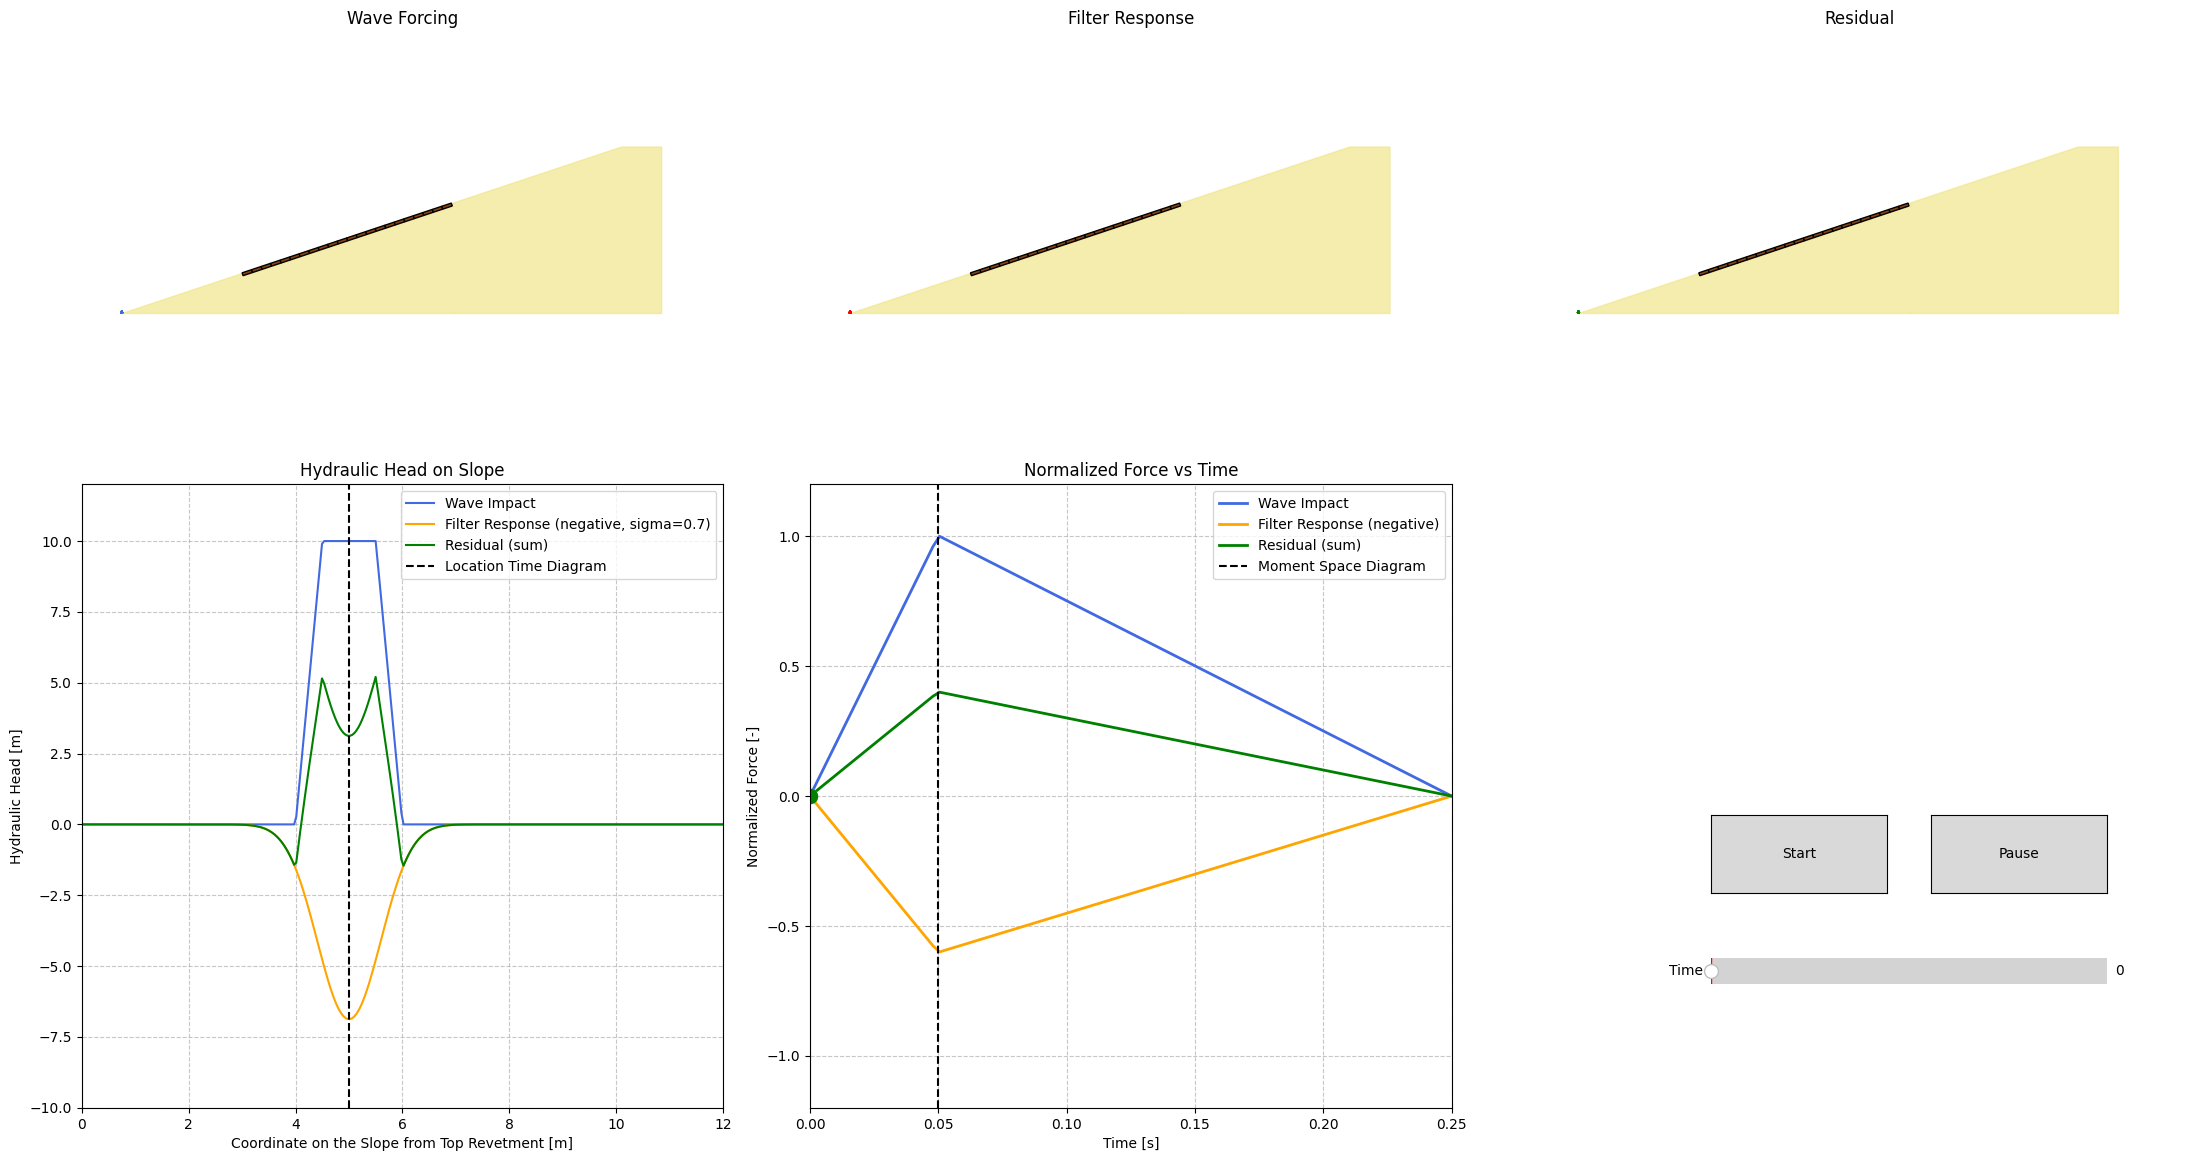

/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_26279/1173219395.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


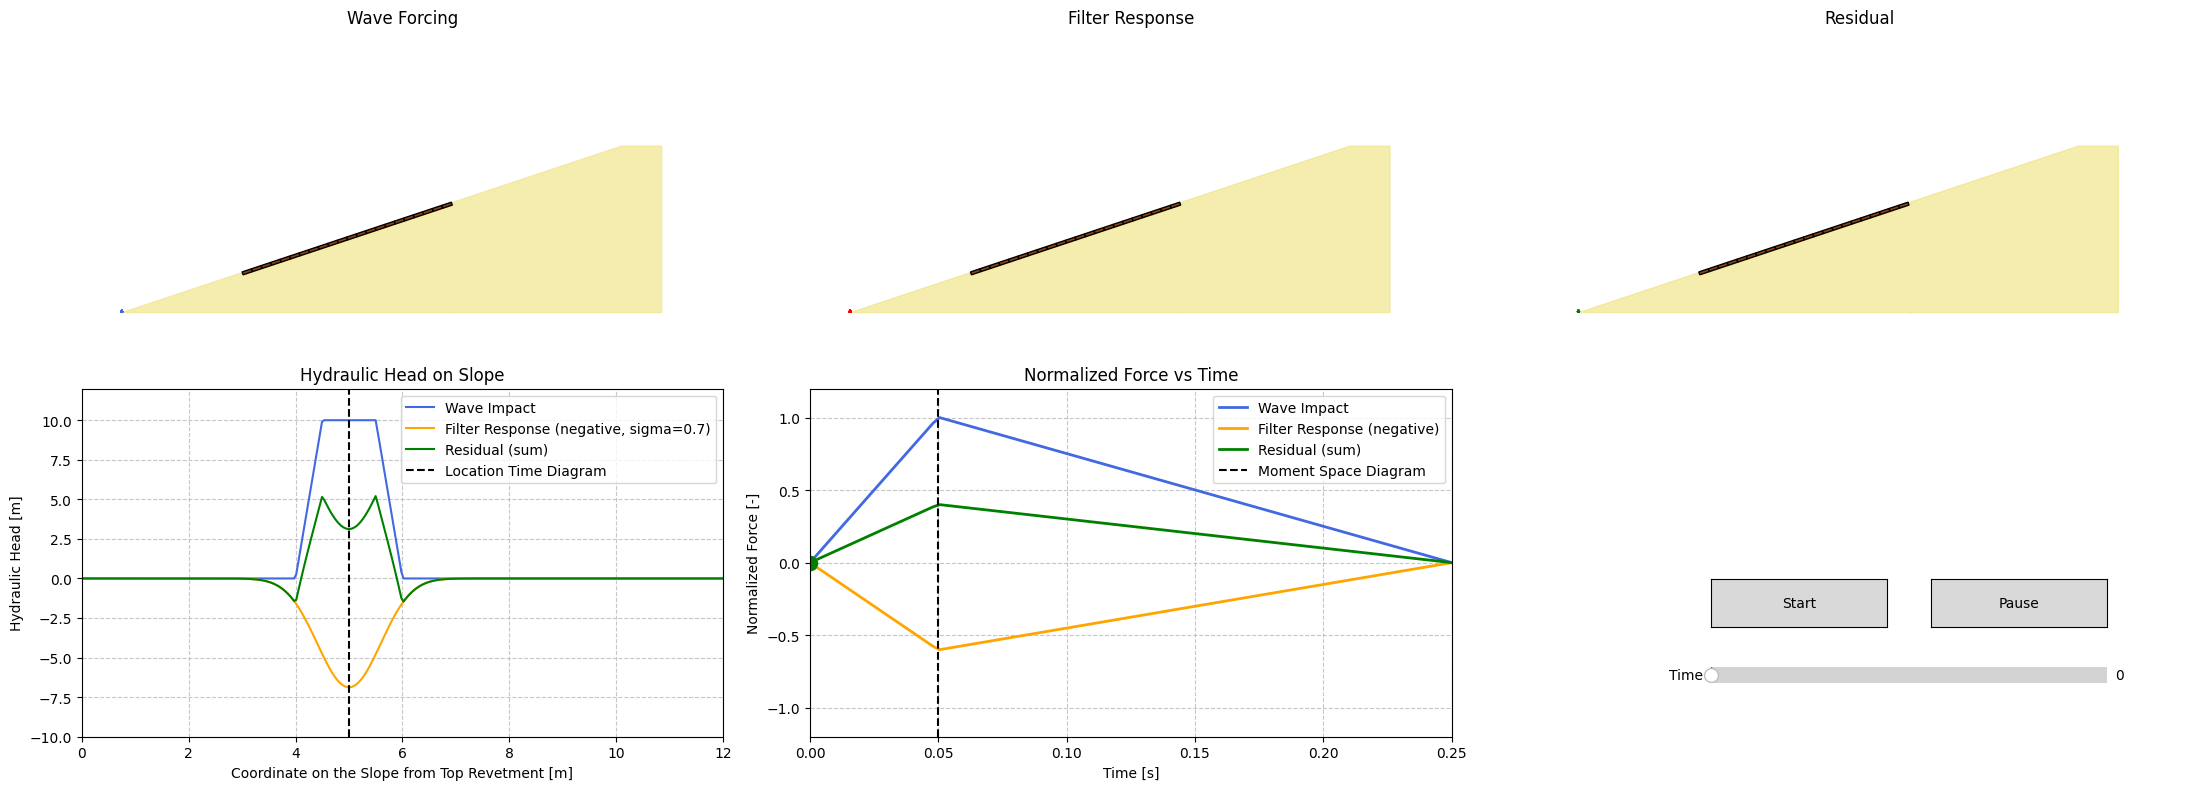

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button, Slider
from scipy.interpolate import interp1d

# --- Dike Profile & Block Coordinates (unchanged) ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope = 1 / 3
angle_rad = np.arctan(slope)
slope_angle = np.degrees(angle_rad)
x_step = block_width * np.cos(angle_rad)
y_step = block_width * np.sin(angle_rad)
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]
block_x_centers = [block_x[j] + block_width / 2 for j in range(n_blocks)]
block_y_centers = [
    block_y[j] + np.sin(angle_rad) * (block_width / 2) + block_height / 2
    for j in range(n_blocks)
]

# --- Slope coordinate (xx) for plot 4 ---
xx = np.linspace(0, 12, 300)

# --- Blue curve: Trapezoid (wave impact) ---
wave_impact_x = np.piecewise(
    xx,
    [xx < 4, (xx >= 4) & (xx < 4.5), (xx >= 4.5) & (xx < 5.5), (xx >= 5.5) & (xx < 6), xx >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),           # Rise from 0 to 10
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),    # Fall from 10 to 0
        0
    ]
)
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
filter_response_x = A * (erf((xx - x1) / sigma) - erf((xx - x2) / sigma)) / 2
filter_response_x = -filter_response_x
residual_x = filter_response_x + wave_impact_x  # CHANGED TO SUM

# --- Convert xx to y_along_slope for interpolation over y ---
y_along_slope = y_start + slope * xx

# --- Interpolators for y coordinates ---
wave_head_from_y = interp1d(y_along_slope, wave_impact_x, bounds_error=False, fill_value=0)
filter_head_from_y = interp1d(y_along_slope, filter_response_x, bounds_error=False, fill_value=0)
residual_head_from_y = interp1d(y_along_slope, residual_x, bounds_error=False, fill_value=0)

block_heads_wave_impact = wave_head_from_y(block_y_centers)
block_heads_filter = filter_head_from_y(block_y_centers)
block_heads_residual = residual_head_from_y(block_y_centers)

# --- For subplot 5 (time-plot): Normalize by the maximum force ---
tt = np.linspace(0, 0.25, 100)
wave_impact_t = np.interp(tt, [0, 0.05, 0.25], [0, 10, 0])
filter_response_t = np.interp(tt, [0, 0.05, 0.25], [0, 6, 0])
filter_response_t = -filter_response_t  # Negative filter response in time
residual_t = filter_response_t + wave_impact_t  # CHANGED TO SUM

norm_factor = np.max(np.abs(wave_impact_t))
wave_impact_t /= norm_factor
filter_response_t /= norm_factor
residual_t /= norm_factor

# --- Prepare interpolation functions from plot 5 for animation ---
t_anim = np.linspace(0, 0.25, 101)
wave_func = interp1d(tt, wave_impact_t, kind='linear')
filter_func = interp1d(tt, filter_response_t, kind='linear')
residual_func = interp1d(tt, residual_t, kind='linear')

# --- Plot Setup: 2 rows, 3 columns (figure size increased) ---
fig, axes = plt.subplots(2, 3, figsize=(22, 8))
# plt.subplots_adjust(bottom=0.22, hspace=0.33, wspace=0.18)

def plot_blocks(ax):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    ax.set_xlim(-2, 30)
    ax.set_ylim(-2, 14)
    ax.set_aspect('equal')
    ax.axis('off')

# --- Animated Subplots 1–3 (top row) ---
for i in range(3):
    plot_blocks(axes[0, i])
titles = ["Wave Forcing", "Filter Response", "Residual"]
for i in range(3):
    axes[0, i].set_title(titles[i])

# --- Animated Arrows for Each Plot (as before, but with correct y) ---
arrow_objs = [[], [], []]
colors = ['royalblue', 'red', 'green']
block_heads = [block_heads_wave_impact, block_heads_filter, block_heads_residual]

for plot_idx in range(3):
    for _ in range(n_blocks):
        arr = axes[0, plot_idx].arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, 
                                      fc=colors[plot_idx], ec=colors[plot_idx])
        arrow_objs[plot_idx].append(arr)

# --- Plot 4: Hydraulic Head vs Slope Coordinate (was axes[1,1], now axes[1,0]) ---

axes[1, 0].plot(xx, wave_impact_x, color='royalblue', label='Wave Impact')
axes[1, 0].plot(xx, filter_response_x, color='orange', label='Filter Response (negative, sigma=0.7)')
axes[1, 0].plot(xx, residual_x, color='green', label='Residual (sum)')
axes[1, 0].axvline(5, color='k', linestyle='--', label='Location Time Diagram')
axes[1, 0].set_xlim(0, 12)
axes[1, 0].set_ylim(-10, 12)
axes[1, 0].set_xlabel('Coordinate on the Slope from Top Revetment [m]')
axes[1, 0].set_ylabel('Hydraulic Head [m]')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 0].set_title("Hydraulic Head on Slope")

# --- Plot 5: Normalized Force-Time Graph (was axes[1,2], now axes[1,1]) ---
line_wave, = axes[1, 1].plot(tt, wave_impact_t, color='royalblue', lw=2, label='Wave Impact')
line_filter, = axes[1, 1].plot(tt, filter_response_t, color='orange', lw=2, label='Filter Response (negative)')
line_resid, = axes[1, 1].plot(tt, residual_t, color='green', lw=2, label='Residual (sum)')
axes[1, 1].plot([0.05, 0.05], [-1.2, 1.2], 'k--', label='Moment Space Diagram')
axes[1, 1].set_xlim(0, 0.25)
axes[1, 1].set_ylim(-1.2, 1.2)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Normalized Force [-]')
axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 1].legend(fontsize=10)
axes[1, 1].set_title("Normalized Force vs Time")
dot_wave, = axes[1, 1].plot([0], [wave_impact_t[0]], 'o', color='royalblue', markersize=10)
dot_filter, = axes[1, 1].plot([0], [filter_response_t[0]], 'o', color='orange', markersize=10)
dot_resid, = axes[1, 1].plot([0], [residual_t[0]], 'o', color='green', markersize=10)

# --- Empty axes[1,2] for buttons and slider ---
axes[1, 2].axis('off')

# --- Buttons in axes[1,2]'s location (place high in the axes space) ---
btn_start = Button(plt.axes([0.78, 0.21, 0.08, 0.06]), 'Start')
btn_pause = Button(plt.axes([0.88, 0.21, 0.08, 0.06]), 'Pause')

# --- Slider directly beneath the buttons (same right column) ---
slider_ax = plt.axes([0.78, 0.13, 0.18, 0.04])
time_slider = Slider(slider_ax, 'Time', 0, 100, valinit=0, valstep=1)

# --- Animation Control ---
running = {'animate': False}
current_frame = {'frame': 0}

def update_arrows_and_dots(frame):
    t = np.linspace(0, 0.25, 101)[frame]
    scale = float(wave_func(t))
    filter_scale = float(filter_func(t))
    resid_scale = float(residual_func(t))
    scaled_heads = [
        block_heads_wave_impact * scale,
        block_heads_filter * scale,
        block_heads_residual * scale
    ]
    for i in range(3):
        for j, arr in enumerate(arrow_objs[i]):
            arrow_x = block_x[j] + block_width / 2
            arrow_y = block_y_centers[j]
            F = -scaled_heads[i][j]   # <--- FLIP DIRECTION
            arrow_dx = -np.sin(angle_rad) * F
            arrow_dy = np.cos(angle_rad) * F
            arr.remove()
            arr_new = axes[0, i].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                                       head_width=0.1, head_length=0.1, 
                                       fc=colors[i], ec=colors[i])
            arrow_objs[i][j] = arr_new
    # Update dots in the normalized force-time plot
    dot_wave.set_data([t], [scale])
    dot_filter.set_data([t], [filter_scale])
    dot_resid.set_data([t], [resid_scale])
    fig.canvas.draw_idle()


def animate(frame):
    if not running['animate']:
        frame = current_frame['frame']
    else:
        current_frame['frame'] = frame
    update_arrows_and_dots(frame)
    return sum(arrow_objs, []) + [dot_wave, dot_filter, dot_resid]

def start(event):
    running['animate'] = True

def pause(event):
    running['animate'] = False

def slider_update(val):
    running['animate'] = False
    current_frame['frame'] = int(time_slider.val)
    update_arrows_and_dots(current_frame['frame'])

btn_start.on_clicked(start)
btn_pause.on_clicked(pause)
time_slider.on_changed(slider_update)

# --- Run Animation ---
ani = FuncAnimation(fig, animate, frames=101, interval=50, blit=False, repeat=True)
plt.tight_layout()
plt.show()


/Users/thomaspennock/Library/Python/3.9/lib/python/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
/var/folders/bh/stlbp3mn0svdlvgn_k9t013m0000gn/T/ipykernel_26279/2415517374.py:227: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


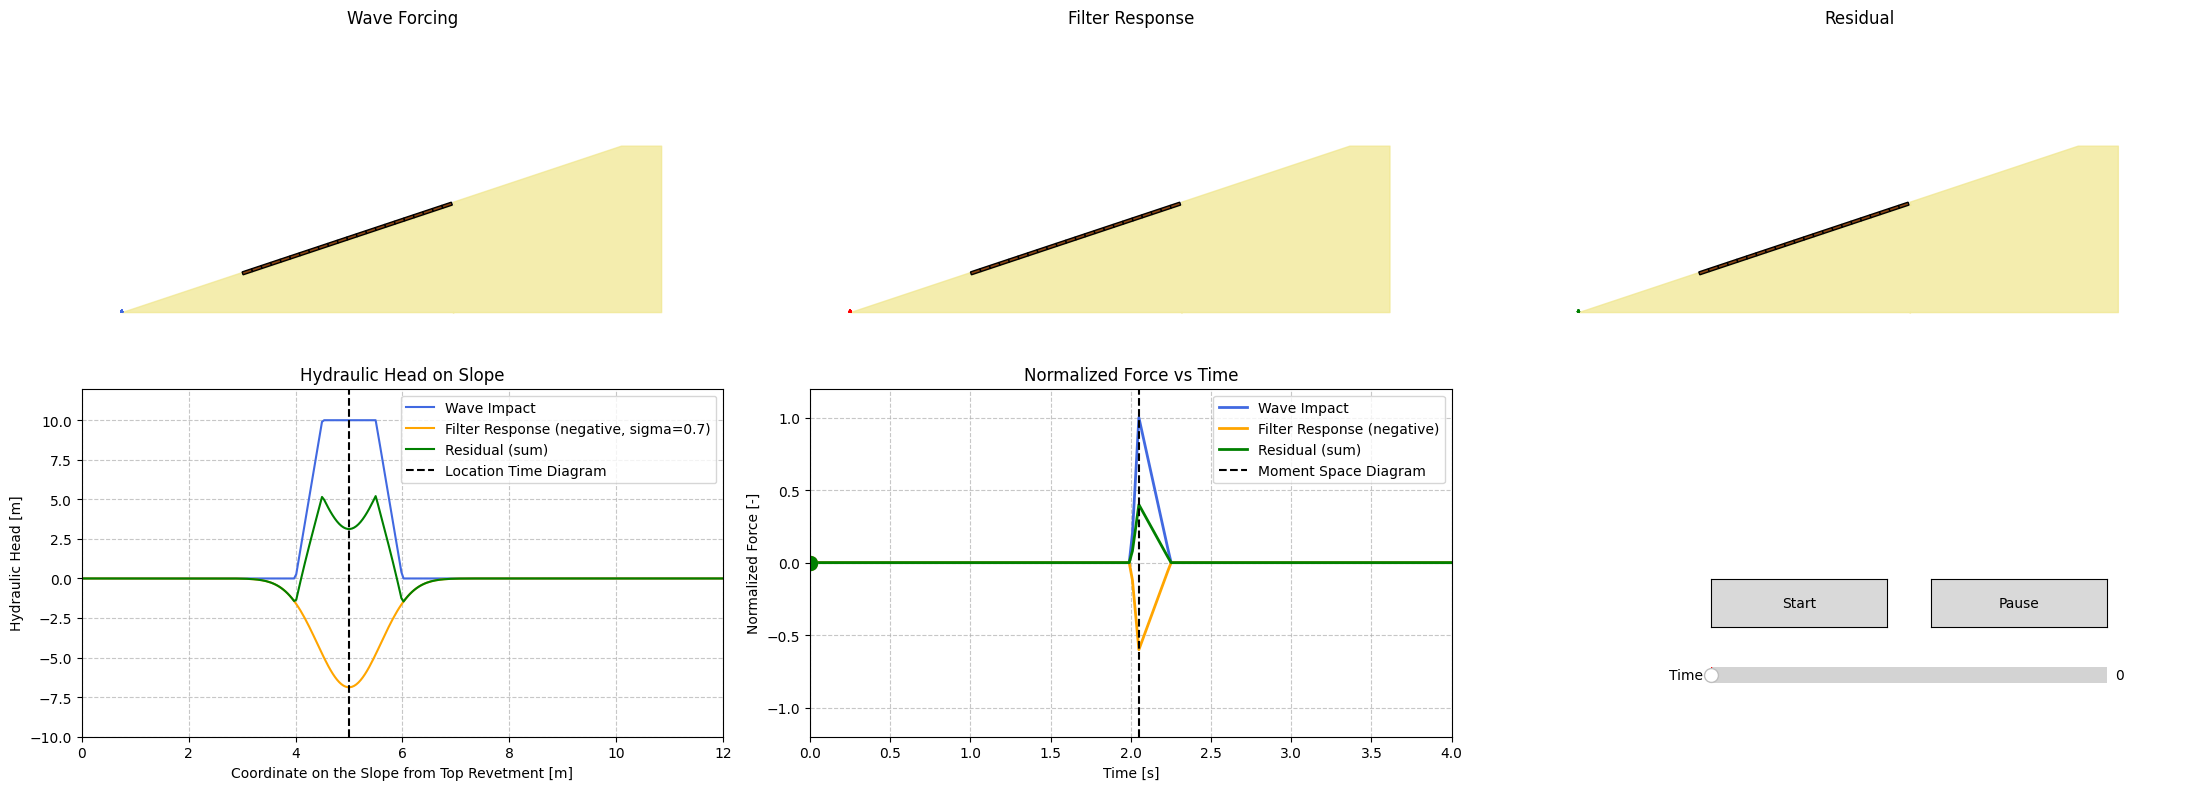

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Button, Slider
from scipy.interpolate import interp1d

# --- Dike Profile & Block Coordinates (unchanged) ---
x_base = [0, 6, 6.05, 16.55, 16.5, 24.9, 26.9]
y_base = [0, 2, 1.86, 5.36, 5.5, 8.3, 8.3]
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope = 1 / 3
angle_rad = np.arctan(slope)
slope_angle = np.degrees(angle_rad)
x_step = block_width * np.cos(angle_rad)
y_step = block_width * np.sin(angle_rad)
block_x = [x_start + i * x_step for i in range(n_blocks)]
block_y = [y_start + i * y_step for i in range(n_blocks)]
block_x_centers = [block_x[j] + block_width / 2 for j in range(n_blocks)]
block_y_centers = [
    block_y[j] + np.sin(angle_rad) * (block_width / 2) + block_height / 2
    for j in range(n_blocks)
]

# --- Slope coordinate (xx) for plot 4 ---
xx = np.linspace(0, 12, 300)

# --- Blue curve: Trapezoid (wave impact) ---
wave_impact_x = np.piecewise(
    xx,
    [xx < 4, (xx >= 4) & (xx < 4.5), (xx >= 4.5) & (xx < 5.5), (xx >= 5.5) & (xx < 6), xx >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),           # Rise from 0 to 10
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),    # Fall from 10 to 0
        0
    ]
)
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
filter_response_x = A * (erf((xx - x1) / sigma) - erf((xx - x2) / sigma)) / 2
filter_response_x = -filter_response_x
residual_x = filter_response_x + wave_impact_x  # CHANGED TO SUM

# --- Convert xx to y_along_slope for interpolation over y ---
y_along_slope = y_start + slope * xx

# --- Interpolators for y coordinates ---
wave_head_from_y = interp1d(y_along_slope, wave_impact_x, bounds_error=False, fill_value=0)
filter_head_from_y = interp1d(y_along_slope, filter_response_x, bounds_error=False, fill_value=0)
residual_head_from_y = interp1d(y_along_slope, residual_x, bounds_error=False, fill_value=0)

block_heads_wave_impact = wave_head_from_y(block_y_centers)
block_heads_filter = filter_head_from_y(block_y_centers)
block_heads_residual = residual_head_from_y(block_y_centers)

# --- For subplot 5 (time-plot): New time vector and force definitions ---
tt = np.linspace(0, 4, 200)  # Extended time: 0 to 4 seconds

# Define the "pulse" between 2.0s and 2.25s
wave_impact_t = np.zeros_like(tt)
filter_response_t = np.zeros_like(tt)

pulse_indices = (tt >= 2.0) & (tt <= 2.25)
pulse_t = tt[pulse_indices] - 2.0  # Pulse time: 0 to 0.25s
# Original pulse profile (triangle): 0 → 10 at t=0.05, then 0 at t=0.25
wave_impact_t[pulse_indices] = np.interp(
    pulse_t, [0, 0.05, 0.25], [0, 10, 0]
)
filter_response_t[pulse_indices] = np.interp(
    pulse_t, [0, 0.05, 0.25], [0, 6, 0]
)
filter_response_t = -filter_response_t  # Negative filter response in time

residual_t = filter_response_t + wave_impact_t

# Normalize by the maximum force (which is still 10)
norm_factor = np.max(np.abs(wave_impact_t))
if norm_factor == 0:
    norm_factor = 1
wave_impact_t /= norm_factor
filter_response_t /= norm_factor
residual_t /= norm_factor

# --- Prepare interpolation functions from plot 5 for animation ---
t_anim = np.linspace(0, 4, 201)
wave_func = interp1d(tt, wave_impact_t, kind='linear', fill_value=0, bounds_error=False)
filter_func = interp1d(tt, filter_response_t, kind='linear', fill_value=0, bounds_error=False)
residual_func = interp1d(tt, residual_t, kind='linear', fill_value=0, bounds_error=False)

# --- Plot Setup: 2 rows, 3 columns (figure size increased) ---
fig, axes = plt.subplots(2, 3, figsize=(22, 8))

def plot_blocks(ax):
    ax.fill_between(x_base, y_base, 0, color='khaki', alpha=0.7)
    for i in range(n_blocks):
        rect = plt.Rectangle((block_x[i], block_y[i]), block_width, block_height,
                             angle=slope_angle, color='saddlebrown', ec='black', lw=1)
        ax.add_patch(rect)
    ax.set_xlim(-2, 30)
    ax.set_ylim(-2, 14)
    ax.set_aspect('equal')
    ax.axis('off')

# --- Animated Subplots 1–3 (top row) ---
for i in range(3):
    plot_blocks(axes[0, i])
titles = ["Wave Forcing", "Filter Response", "Residual"]
for i in range(3):
    axes[0, i].set_title(titles[i])

# --- Animated Arrows for Each Plot (as before, but with correct y) ---
arrow_objs = [[], [], []]
colors = ['royalblue', 'red', 'green']
block_heads = [block_heads_wave_impact, block_heads_filter, block_heads_residual]

for plot_idx in range(3):
    for _ in range(n_blocks):
        arr = axes[0, plot_idx].arrow(0, 0, 0, 0, head_width=0.1, head_length=0.1, 
                                      fc=colors[plot_idx], ec=colors[plot_idx])
        arrow_objs[plot_idx].append(arr)

# --- Plot 4: Hydraulic Head vs Slope Coordinate (was axes[1,1], now axes[1,0]) ---

axes[1, 0].plot(xx, wave_impact_x, color='royalblue', label='Wave Impact')
axes[1, 0].plot(xx, filter_response_x, color='orange', label='Filter Response (negative, sigma=0.7)')
axes[1, 0].plot(xx, residual_x, color='green', label='Residual (sum)')
axes[1, 0].axvline(5, color='k', linestyle='--', label='Location Time Diagram')
axes[1, 0].set_xlim(0, 12)
axes[1, 0].set_ylim(-10, 12)
axes[1, 0].set_xlabel('Coordinate on the Slope from Top Revetment [m]')
axes[1, 0].set_ylabel('Hydraulic Head [m]')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 0].set_title("Hydraulic Head on Slope")

# --- Plot 5: Normalized Force-Time Graph (was axes[1,2], now axes[1,1]) ---
line_wave, = axes[1, 1].plot(tt, wave_impact_t, color='royalblue', lw=2, label='Wave Impact')
line_filter, = axes[1, 1].plot(tt, filter_response_t, color='orange', lw=2, label='Filter Response (negative)')
line_resid, = axes[1, 1].plot(tt, residual_t, color='green', lw=2, label='Residual (sum)')
axes[1, 1].plot([2.05, 2.05], [-1.2, 1.2], 'k--', label='Moment Space Diagram')
axes[1, 1].set_xlim(0, 4)
axes[1, 1].set_ylim(-1.2, 1.2)
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Normalized Force [-]')
axes[1, 1].grid(True, which='both', linestyle='--', alpha=0.7)
axes[1, 1].legend(fontsize=10)
axes[1, 1].set_title("Normalized Force vs Time")
dot_wave, = axes[1, 1].plot([0], [wave_impact_t[0]], 'o', color='royalblue', markersize=10)
dot_filter, = axes[1, 1].plot([0], [filter_response_t[0]], 'o', color='orange', markersize=10)
dot_resid, = axes[1, 1].plot([0], [residual_t[0]], 'o', color='green', markersize=10)

# --- Empty axes[1,2] for buttons and slider ---
axes[1, 2].axis('off')

# --- Buttons in axes[1,2]'s location (place high in the axes space) ---
btn_start = Button(plt.axes([0.78, 0.21, 0.08, 0.06]), 'Start')
btn_pause = Button(plt.axes([0.88, 0.21, 0.08, 0.06]), 'Pause')

# --- Slider directly beneath the buttons (same right column) ---
slider_ax = plt.axes([0.78, 0.13, 0.18, 0.04])
time_slider = Slider(slider_ax, 'Time', 0, len(tt) - 1, valinit=0, valstep=1)

# --- Animation Control ---
running = {'animate': False}
current_frame = {'frame': 0}

def update_arrows_and_dots(frame):
    t = tt[frame]
    scale = float(wave_func(t))
    filter_scale = float(filter_func(t))
    resid_scale = float(residual_func(t))
    scaled_heads = [
        block_heads_wave_impact * scale,
        block_heads_filter * scale,
        block_heads_residual * scale
    ]
    for i in range(3):
        for j, arr in enumerate(arrow_objs[i]):
            arrow_x = block_x[j] + block_width / 2
            arrow_y = block_y_centers[j]
            F = -scaled_heads[i][j]   # <--- FLIP DIRECTION
            arrow_dx = -np.sin(angle_rad) * F
            arrow_dy = np.cos(angle_rad) * F
            arr.remove()
            arr_new = axes[0, i].arrow(arrow_x, arrow_y, arrow_dx, arrow_dy,
                                       head_width=0.1, head_length=0.1, 
                                       fc=colors[i], ec=colors[i])
            arrow_objs[i][j] = arr_new
    # Update dots in the normalized force-time plot
    dot_wave.set_data([t], [scale])
    dot_filter.set_data([t], [filter_scale])
    dot_resid.set_data([t], [resid_scale])
    fig.canvas.draw_idle()

def animate(frame):
    if not running['animate']:
        frame = current_frame['frame']
    else:
        current_frame['frame'] = frame
    update_arrows_and_dots(frame)
    return sum(arrow_objs, []) + [dot_wave, dot_filter, dot_resid]

def start(event):
    running['animate'] = True

def pause(event):
    running['animate'] = False

def slider_update(val):
    running['animate'] = False
    current_frame['frame'] = int(time_slider.val)
    update_arrows_and_dots(current_frame['frame'])

btn_start.on_clicked(start)
btn_pause.on_clicked(pause)
time_slider.on_changed(slider_update)

# --- Run Animation ---
ani = FuncAnimation(fig, animate, frames=len(tt), interval=50, blit=False, repeat=True)
plt.tight_layout()
plt.show()


In [25]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from scipy.special import erf

# Block geometry and residual_x calculation
x_start, y_start = 6.05, 1.86
block_width = 0.5
block_height = 0.15
n_blocks = 22
slope = 1 / 3
angle_rad = np.arctan(slope)
block_x = [x_start + i * block_width * np.cos(angle_rad) for i in range(n_blocks)]
block_y = [y_start + i * block_width * np.sin(angle_rad) for i in range(n_blocks)]
block_y_centers = [
    block_y[j] + np.sin(angle_rad) * (block_width / 2) + block_height / 2
    for j in range(n_blocks)
]
xx = np.linspace(0, 12, 300)
y_along_slope = y_start + slope * xx
A = 10
x1 = 4.5
x2 = 5.5
sigma = 0.7
wave_impact_x = np.piecewise(
    xx,
    [xx < 4, (xx >= 4) & (xx < 4.5), (xx >= 4.5) & (xx < 5.5), (xx >= 5.5) & (xx < 6), xx >= 6],
    [
        0,
        lambda x: (x - 4) * (10 / 0.5),
        10,
        lambda x: 10 - (x - 5.5) * (10 / 0.5),
        0
    ]
)
filter_response_x = A * (erf((xx - x1) / sigma) - erf((xx - x2) / sigma)) / 2
filter_response_x = -filter_response_x
residual_x = filter_response_x + wave_impact_x
residual_head_from_y = interp1d(y_along_slope, residual_x, bounds_error=False, fill_value=0)
block_heads_residual = residual_head_from_y(block_y_centers)

# Time and time-resolved residual_t calculation
tt = np.linspace(0, 4, 200)
wave_impact_t = np.zeros_like(tt)
filter_response_t = np.zeros_like(tt)
pulse_indices = (tt >= 2.0) & (tt <= 2.25)
pulse_t = tt[pulse_indices] - 2.0
wave_impact_t[pulse_indices] = np.interp(pulse_t, [0, 0.05, 0.25], [0, 10, 0])
filter_response_t[pulse_indices] = np.interp(pulse_t, [0, 0.05, 0.25], [0, 6, 0])
filter_response_t = -filter_response_t
residual_t = filter_response_t + wave_impact_t
norm_factor = np.max(np.abs(wave_impact_t))
if norm_factor == 0:
    norm_factor = 1
residual_t /= norm_factor

# High-res time extended to 11.99
time_high_res = np.arange(0, 11.991, 0.01)
residual_func = interp1d(tt, residual_t, kind='linear', fill_value=0, bounds_error=False)

# Table construction: multiply by 1000 and round as requested
data = []
for t in time_high_res:
    # Repeat pulse every 4 seconds
    t_mod = t % 4
    res_val = residual_func(t_mod)
    forces = np.round(block_heads_residual * res_val * 1000, 5)  # Round to 5 decimals
    data.append([round(t, 3)] + list(forces))  # Time rounded to 3 decimals

columns = ["Time [s]"] + [f"Block {i+1}" for i in range(n_blocks)]
df = pd.DataFrame(data, columns=columns)

# Save as XLSX
df.to_excel("residual_forces_blocks.xlsx", index=False)


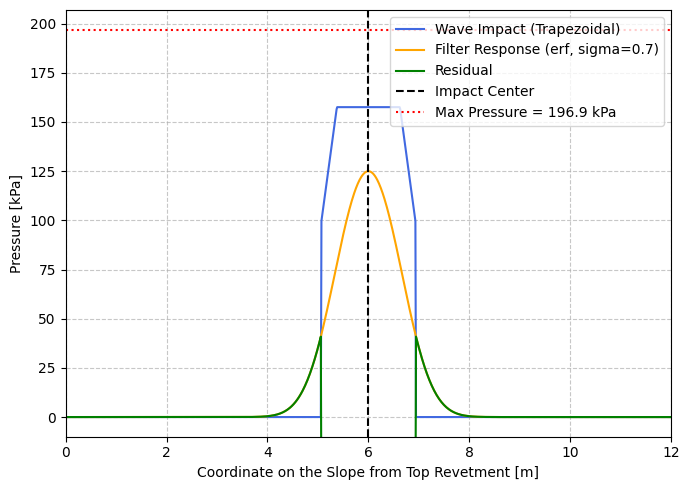

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# === Pressure calculation ===
rho_w = 1025         # [kg/m^3]
g = 9.81             # [m/s^2]
Hs = 2.5             # [m]
Hn_Hs_ratio = 1.53
Hn = Hs * Hn_Hs_ratio
xi = 1.0             # Iribarren number

# Equation C.3
pressure_coeff = 8 - 1.6 * xi - 2 * (xi - 0.2) ** 2
P_max = pressure_coeff * rho_w * g * Hn / 1000  # [kPa]

# === Define trapezoidal shape based on sketch ===
x = np.linspace(0, 12, 1000)
x_mid = 6.0
B_imp = 0.75 * Hs            # Total width of the pressure distribution
B_flat = 0.50 * Hs           # Flat top width
p_top = 0.8 * P_max          # Top value
p_base = 0.5 * P_max         # Base value

# Compute edges
left_base = x_mid - B_imp / 2
right_base = x_mid + B_imp / 2
left_flat = x_mid - B_flat / 2
right_flat = x_mid + B_flat / 2

# Build the trapezoid
blue = np.piecewise(
    x,
    [x < left_base,
     (x >= left_base) & (x < left_flat),
     (x >= left_flat) & (x < right_flat),
     (x >= right_flat) & (x < right_base),
     x >= right_base],
    [
        0,
        lambda x: p_base + (p_top - p_base) * (x - left_base) / (left_flat - left_base),   # left ramp
        p_top,                                                                            # flat top
        lambda x: p_top - (p_top - p_base) * (x - right_flat) / (right_base - right_flat),# right ramp
        0
    ]
)

# === Filter response (orange) ===
A = p_top  # same peak as impact for now
x1 = left_flat
x2 = right_flat
sigma = 0.7
orange = A * (erf((x - x1) / sigma) - erf((x - x2) / sigma)) / 2

# === Residual (green) ===
green = orange - blue

# === PLOTTING ===
plt.figure(figsize=(7, 5))
plt.plot(x, blue, color='royalblue', label='Wave Impact (Trapezoidal)')
plt.plot(x, orange, color='orange', label='Filter Response (erf, sigma=0.7)')
plt.plot(x, green, color='green', label='Residual')
plt.axvline(x_mid, color='k', linestyle='--', label='Impact Center')
plt.axhline(P_max, color='red', linestyle=':', label=f'Max Pressure = {P_max:.1f} kPa')

plt.xlim(0, 12)
plt.ylim(-10, P_max + 10)
plt.xlabel('Coordinate on the Slope from Top Revetment [m]')
plt.ylabel('Pressure [kPa]')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


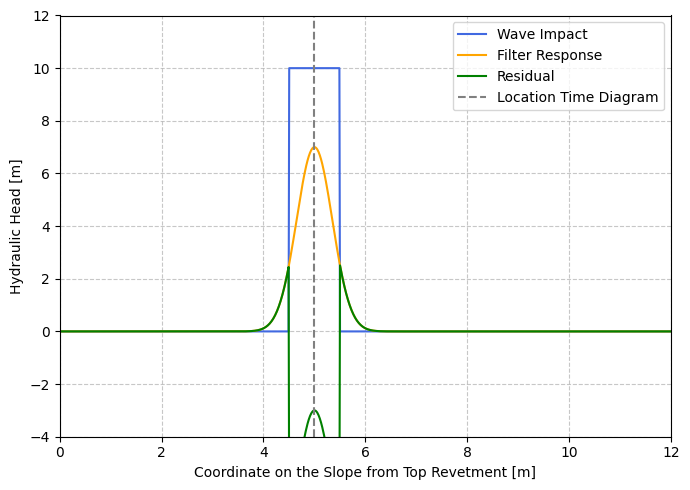

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# X-axis
x = np.linspace(0, 12, 1000)

# === Wave Impact: Sharp Trapezoid ===
A = 10               # Peak height in [m]
width_total = 1.0    # Width of trapezoid [m]
x_center = 5.0       # Center coordinate [m]
left = x_center - width_total / 2
right = x_center + width_total / 2

wave_impact = np.where((x >= left) & (x <= right), A, 0)

# === Filter Response: Gaussian ===
mu = x_center
sigma = 0.35  # controls width
filter_response = 7 * np.exp(-0.5 * ((x - mu) / sigma) ** 2)  # peak < wave_impact

# === Residual ===
residual = filter_response - wave_impact

# === Plotting ===
plt.figure(figsize=(7, 5))
plt.plot(x, wave_impact, color='royalblue', label='Wave Impact')
plt.plot(x, filter_response, color='orange', label='Filter Response')
plt.plot(x, residual, color='green', label='Residual')
plt.axvline(x_center, color='gray', linestyle='--', label='Location Time Diagram')

plt.xlim(0, 12)
plt.ylim(-4, 12)
plt.xlabel('Coordinate on the Slope from Top Revetment [m]')
plt.ylabel('Hydraulic Head [m]')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

